# **Veri Bilimi için İstatistik**

## **Örnek Teorisi**

"İstatistiğe dayalı olmadan, bir veri bilimci laboratuvar asistanıdır." -Martyn Jones

İstatistik veri biliminin "bilim", makine öğrenmesinin "öğrenme" kısmıdır.

Örneklem; bir popülasyon içerisinden, bu popülasyonu temsil ettiği düşünülen bir alt küme seçme işlemidir.

Merkezi Limit Teoremi: Bağımsız ve aynı dağılıma sahip rassal değişkenlerin toplamı ya da aritmetik ortalaması yaklaşık olarak normal dağılmaktadır.

## Örnek Teorisi Uygulaması

In [2]:
import numpy as np

In [3]:
populasyon = np.random.randint(0, 80, 10000)

10000 kişilik bir ilçede bulunan insanların yaşları populasyon olarak tanımlandı.

In [4]:
populasyon[0:10]

array([ 2, 51,  7, 59, 51, 57, 30,  9, 12, 46])

**Örneklem Çekimi**

In [ ]:
np.random.seed(10)

Yapılacak olan işlemlerin her tekrar edildiğinde aynı sonuçları getirmesini garanti altına alan işlem.

In [6]:
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]

array([77, 66, 67, 50, 72, 42, 27, 78, 31,  3])

In [7]:
orneklem.mean()

39.52

In [8]:
populasyon.mean()

39.3122

Görüldüğü üzere örneklemin ortalaması popülasyonun ortalamasına çok yakın. Başka örneklemler de ele alınarak en iyi örneklem kullanılabilir.

**Örneklem Dağılımı**

In [21]:
np.random.seed(140)
orneklem1 = np.random.choice(a = populasyon, size = 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [22]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

39.03

Çekilen 10 örneklemin ortalamasını almak sonucu popülasyon ortalamasına **yaklaştırabilir**. Örneklem kalitesine bağlı olarak çekilen tek örneklem daha iyi olabilir.

## Betimsel İstatistikler

* Ortalama
* Mod
* Medyan
* Kartiller
* Değişim Aralığı
* Standart Sapma
* Kovaryans
* Korelasyon

Kovaryans: İki değişken arasındaki ilişkinin değişkenlik ölçüsüdür.

Korelasyon: İki değişken arasındaki ilişkiyi, ilişkinin anlamlı olup olmadığını, ilişkinin şiddetini ve yönünü ifade eden istatistiksel bir tekniktir.

## Betimsel İstatistikler Uygulamaları

In [26]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [28]:
!pip install researchpy

In [29]:
import researchpy as rp

In [30]:
rp.summary_cont(df[["total_bill", "tip", "size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [31]:
rp.summary_cat(df[["sex", "smoker", "day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [32]:
df[["tip", "total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [33]:
df[["tip", "total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


tip ile total_bill arasında 0.67'lik pozitif orta şiddetli bir ilişki olduğu görülmektedir.

## Güven Aralığı

Anakütle parametresinin tahmini değerini kapsayabilecek iki sayıdan oluşan bir aralık bulunmasıdır.

**Güven Aralığının Hesaplanması**

* Adım 1: n, ortalama ve standart sapmayı bul. (n = 100, ort = 180, standart sapma = 40)
* Adım 2: Güven aralığına karar ver: %95 mi %99 mu? (%95 kullanılır.)
* Adım 3: Z tablo değerini hesapla. (1.96 - 2.57)
* Adım 4: Bulunan değerleri kullanarak aşağıdaki formül ile güven aralığını hesapla.

x(ort) +- z * (s / karekök(n))

180 +- 1.96 * (40 / karekök(100)) = 180 +- 7.84

Yani güven aralığı 172 ile 188 arasıdır.

## Güven Aralığı İş Uygulaması

**Problem**

CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik istiyor.

**Detaylar**

* Satıcı, alıcı ve bir ürün var.
* Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor.
* Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

**Uygulama**

In [34]:
import numpy as np
fiyatlar = np.random.randint(10, 110, 1000)

In [35]:
fiyatlar.mean()

59.449

In [36]:
import statsmodels.stats.api as sms

In [37]:
sms.DescrStatsW(fiyatlar).tconfint_mean()

(57.68067724742797, 61.217322752572024)

## **Olasılığa Giriş Ve Olasılık Dağılımları**

Değerlerini bir deneyin sonuçlarından alan değişkene rassal değişken adı verilir.

* Dağılım: Evrende gerçekleşen olayların sayısal karşılıklarının ortaya çıkardığı yapıya dağılım denir.
* Olasılık Dağılımı: Bir rassal olaya ait değerler ve bu değerlerin gerçekleşme olasılıklarının bir arada ifade edilmesine olasılık dağılımı denir.
* Olasılık Fonksiyonu: Bir değişkenin herhangi bir değeri almasının olasılığını hesaplayan fonksiyona olasılık fonksiyonu denir.

**Kesikli Olasılık Dağılımları**

* Bernoulli
* Binom
* Poisson

**Sürekli Olasılık Dağılımları**

* Normal Dağılım
* Üniform Dağılım
* Üstel Dağılım

## Bernoulli Dağılımı

Başarılı-başarısız, olumlu-olumsuz şeklindeki iki sonuçlu olaylar ile ilgilenildiğinde kullanılan kesikli olasılık dağılımıdır.

${\displaystyle f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}}$

${\displaystyle \operatorname {E} \left(X\right)=p}$

$\operatorname {Var} [X]=pq=p(1-p)$

In [41]:
from scipy.stats import bernoulli

In [42]:
p = 0.6

In [46]:
rv = bernoulli(p)
rv.pmf(k = 1)

0.6

pmf: Probability Mass Functions (Olasılık Kütle Fonksiyonu)

In [47]:
rv.pmf(k = 0)

0.4

## Büyük Sayılar Yasası

Bir rassal değişkenin uzun vadeli kararlılığını tanımlayan olasılık teoremidir.

In [51]:
import numpy as np
rng = np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2, size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı: ", deney_sayisi, "---", "Yazı Olasılığı: %.2f" % (yazi_olasiliklari*100))

Atış Sayısı:  2 --- Yazı Olasılığı: 50.00
Atış Sayısı:  4 --- Yazı Olasılığı: 0.00
Atış Sayısı:  8 --- Yazı Olasılığı: 62.50
Atış Sayısı:  16 --- Yazı Olasılığı: 43.75
Atış Sayısı:  32 --- Yazı Olasılığı: 46.88
Atış Sayısı:  64 --- Yazı Olasılığı: 56.25
Atış Sayısı:  128 --- Yazı Olasılığı: 50.78
Atış Sayısı:  256 --- Yazı Olasılığı: 52.73
Atış Sayısı:  512 --- Yazı Olasılığı: 52.93
Atış Sayısı:  1024 --- Yazı Olasılığı: 50.20
Atış Sayısı:  2048 --- Yazı Olasılığı: 48.58
Atış Sayısı:  4096 --- Yazı Olasılığı: 49.49
Atış Sayısı:  8192 --- Yazı Olasılığı: 49.58
Atış Sayısı:  16384 --- Yazı Olasılığı: 49.96
Atış Sayısı:  32768 --- Yazı Olasılığı: 50.00
Atış Sayısı:  65536 --- Yazı Olasılığı: 49.68
Atış Sayısı:  131072 --- Yazı Olasılığı: 49.97
Atış Sayısı:  262144 --- Yazı Olasılığı: 50.13
Atış Sayısı:  524288 --- Yazı Olasılığı: 50.01
Atış Sayısı:  1048576 --- Yazı Olasılığı: 50.09


## Binom Dağılımı

Binom dağılımı, bağımsız n deneme sonucu k başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır.

${\displaystyle f(k;n,p)={n \choose k}p^{k}(1-p)^{n-k}}$, k = 0, 1, 2, ...,n


${\displaystyle \operatorname {E} (X)=np}$


${\displaystyle \operatorname {Var} (X)=np(1-p)}$

**İş Uygulaması: Reklam Harcaması Optimizasyonu**

Problem :

Çeşitli mecralara reklamlar veriliyor, reklamların tıklama ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniyor.

Detaylar:

* Bir mecrada reklam verilecek.
* Dağılım ve reklama tıklama olasılığı biliniyor. (0.01)

Soru:

Reklamı 100 kişi gördüğünde 1, 5, 10 tıklanması olasılığı nedir?

In [3]:
from scipy.stats import binom

In [4]:
p = 0.01
n = 100
rv = binom(n, p)
print(rv.pmf(1))
print(rv.pmf(5))
print(rv.pmf(10))

0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


## Poisson Dağılımı

Belirli bir zaman aralığında ve belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.

Bir olayın nadir kabul edilebilmesi için n > 50 ve n*p < 5 (lambda) olması gerekmektedir.
* Rassal denemeler iki sonuçlu olmalıdır.
* Aynı koşullar altında gerçekleştirilmelidir.
* Birbirlerinden bağımsız olmalıdır.

${\displaystyle f(x,\lambda )={\frac {\lambda ^{x}e^{-\lambda }}{x!}}\,\!}$,  x = 0,1,2,...,n

**İş Uygulaması: İlan Giriş Hata Olasılıkları**

Problem:
    
Hatalı ilan giriş olasılıkları hesaplanmak isteniyor.

Detaylar:
* Bir yıl süresince ölçüm yapılıyor.
* Dağılım biliniyor (Poisson) ve Lambda 0.1 (Ortalama hata sayısı)

Soru:

Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?

In [54]:
from scipy.stats import poisson

In [56]:
lambda_ = 0.1

In [57]:
rv = poisson(mu = lambda_)
print(rv.pmf(k = 0))

0.9048374180359595


In [58]:
print(rv.pmf(k = 3))

0.00015080623633932676


In [59]:
print(rv.pmf(k = 5))

7.54031181696634e-08


## Normal Dağılım

Normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması için kullanılır.

${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

* $\mu$  ortalama ya da dağılımın beklenen değeri

* ${\displaystyle \sigma }$  standart sapma

* ${\displaystyle \sigma ^{2}}$ varyans

**İş Uygulaması: Satış Olasılıklarının Hesaplanması**

90k'dan fazla olması olasılığı

Problem:
    
Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.

Detaylar:
* Dağılımın normal olduğu biliniyor.
* Aylık ortalama satış sayısı 80k, standart sapması 5k.

Soru:

90k'dan fazla satış yapma olasılığı nedir?

90k'dan fazla olması olasılığı;

In [1]:
from scipy.stats import norm

In [2]:
1-norm.cdf(90,80,5)

0.02275013194817921

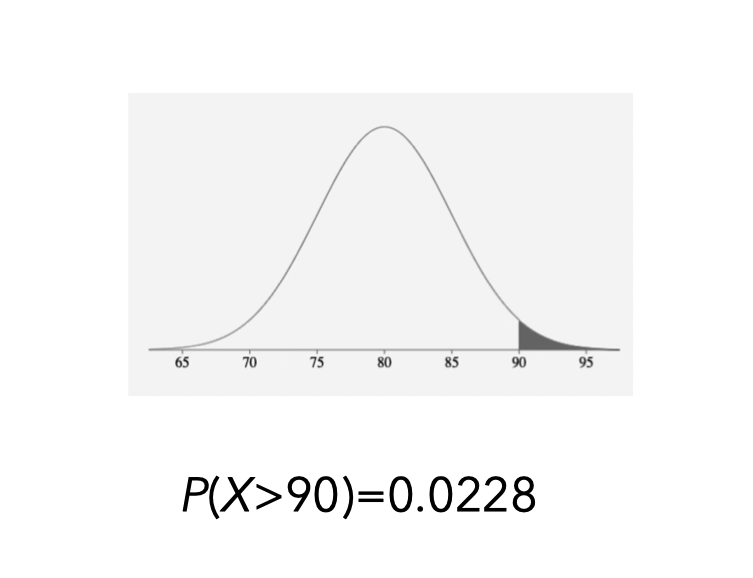

70k'dan fazla olması olasılığı;

In [3]:
1-norm.cdf(70,80,5)

0.9772498680518208

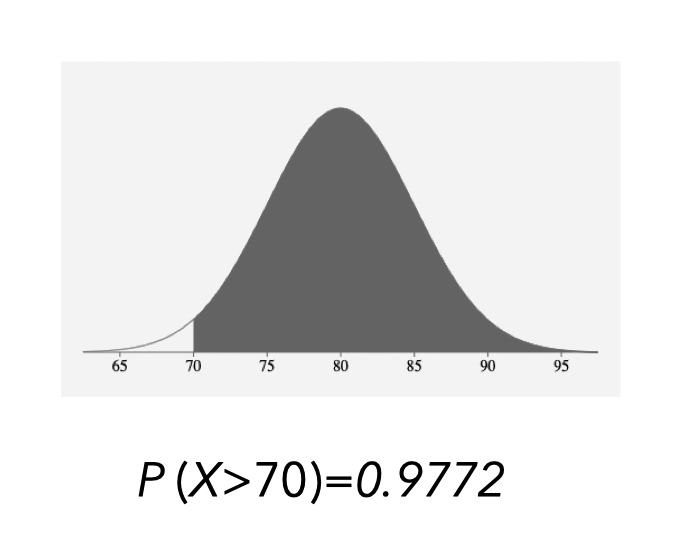

73k'dan az olma olasılığı;

In [4]:
norm.cdf(73,80,5)

0.08075665923377107

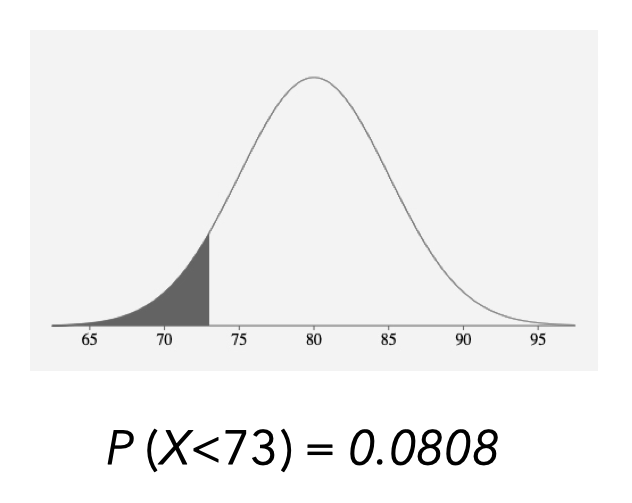

85k ile 90k arasında olması olasılığı;

In [65]:
norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

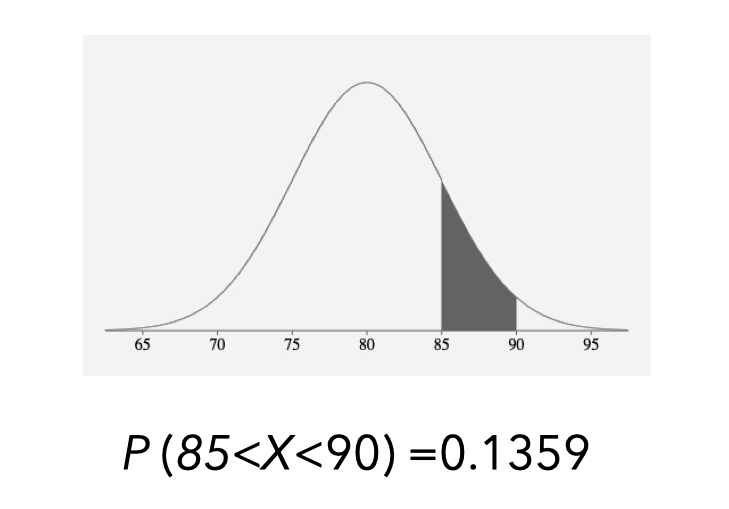

## **Hipotez Testleri**

Bir inanışı (bir savı, bir tahmini vs.) test etmek için kullanılan istatistiksel bir tekniktir.

Hipotez testleri, şans eseri ortaya çıkma durumlarını da göz önünde bulundurarak, şansa yer vermeyecek şekilde ilgilenilen konuda ispat etme imkanı sunar.

## Hipotezler ve Türleri

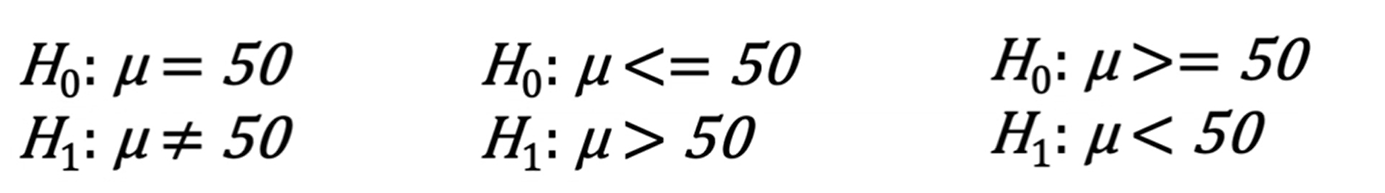

## Hata Tipleri

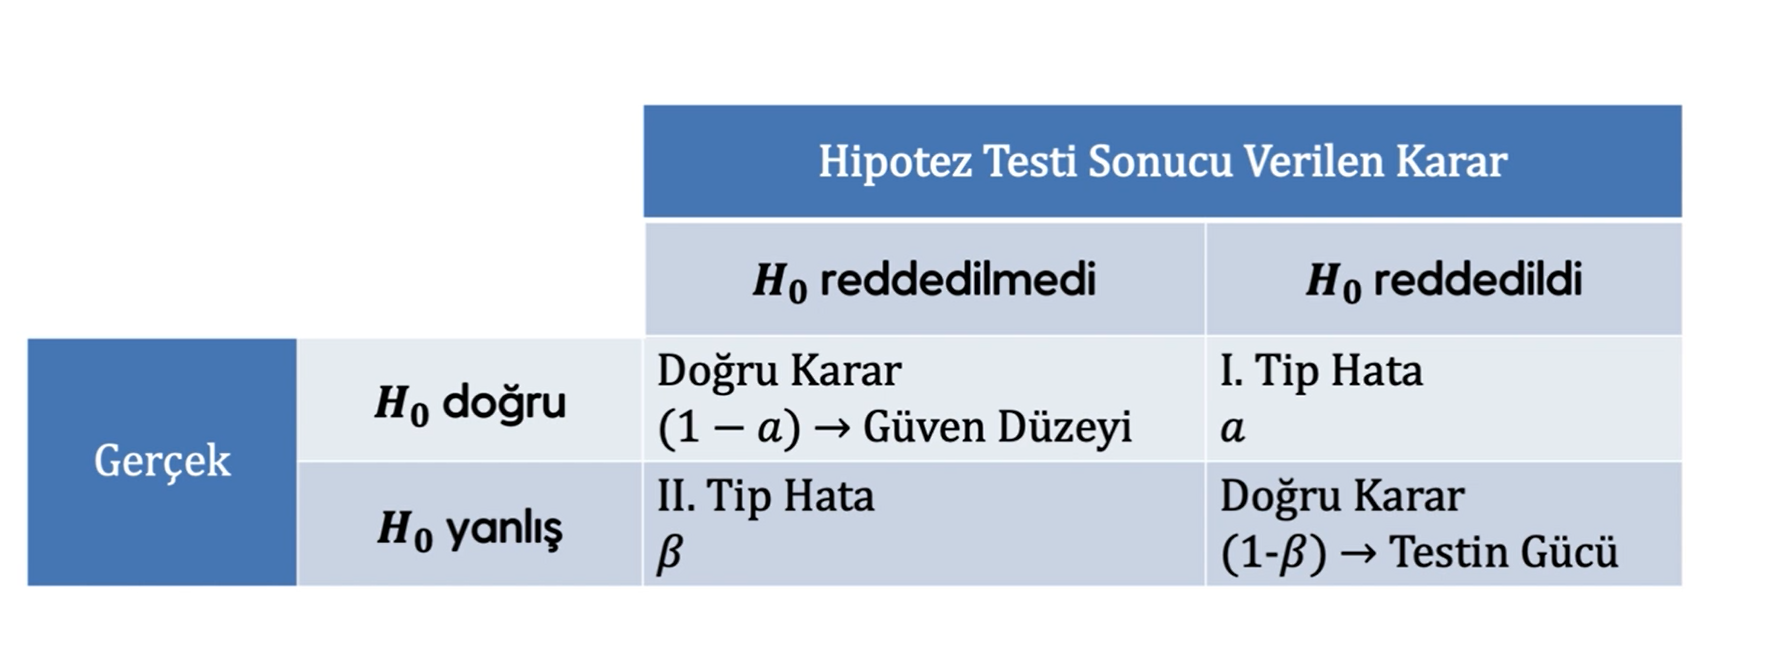

## P-Value

**p < 0.05**

Hipotez testlerinin sonuçlarını değerlendirmek üzere programlar tarafından p-value değeri verilir. Bu değer üzerinden yorum yapılabilir.

p-value değeri 0.05'den (kabul edilebilir hata miktarı) küçük olursa H0 hipotezi **genellikle** reddedilir.

Her zaman p-value 0.05'den küçük olduğunda H0 hipotezi reddedilmeyebilir. Dağılım testlerinde H0 reddedilmek istenilmez çünkü H0 "örnek dağılımı ile teorik dağılım arasında fark yoktur" der.

## Hipotez Testi Adımları

Adım 1: Hipotezlerin kurulması ve yönlerinin belirlenmesi.

Adım 2: Anlamlılık düzeyinin ve tablo değerinin belirlenmesi. (α = 0.05)

Adım 3: Test istatistiğinin belirlenmesi ve test istatistiğinin hesaplanması.

Adım 4: Hesaplanan test istatistiği ile α'ya karşılık gelen tablo değerinin karşılaştırılması.

Test istatistiği (Zh) > Tablo Değeri (Zt) ise H0 red.

Adım 5: Tabloya göre yorum yapılması.

## **Tek Örneklem T Testi ve Tek Örneklem Oran Testi**

Popülasyon ortalaması ile varsayımsal bir değer arasında istatistiksel olarak anlamlı bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir.

Basitçe örnek ortalamasına ilişkin test yapmak için kullanılır.

**Tek Örneklem T Testi: Hipotezler**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Tek Örneklem T Testi: Test İstatistiği**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$

${\displaystyle z={\frac {{\bar {x}}-\mu _{0}}{\frac {\displaystyle \sigma} {\sqrt {n}}}}}$

* Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
* Anakütle standart sapması bilinmiyorsa ve n > 30 ise z istatistiği kullanılır.
* Anakütle standart sapması bilinmiyorsa ve n < 30 ise t istatistiği kullanılır.

(n büyüdükçe t, z'ye yaklaşır.)

**Tek Örneklem T Testi: Varsayım**
* Normal Dağılım

## İş Uygulaması: Ürün Satın Alma Adım Optimizasyonu

Problem:

Sepete ürün ekleme işlemi sonrasında ödeme ekranında 5 adım vardır ve bu adımların birisi sorgulanmaktadır.

Detaylar:

* Her adımın 20'şer saniye olması hedefi var, 4. adım sorgulanıyor.
* Bu durumu test etmek için 100 örnek alınıyor.
* Örnek standart sapması 5 saniyedir. Örnek ortalaması ise 19 saniyedir.

**Adım 1:**  

H0: μ = 20 (Kişilerin 4. adımda geçirdikleri sürenin ortalaması 20 saniyedir.)

H1: μ != 20 (Kişilerin 4. adımda geçirdikleri sürenin ortalaması 20 saniyeden farklıdır.)

**Adım 2:**

α = 0.05

α/2 = 0.025 (Kurulan alternatif hipotez (H1) 2 yönlü olduğu için α 2'ye bölünüp bu değer üzerinden tablo incelenir. Eğer H1 > veya < olsaydı alternatif hipotez tek yönlü olacağı için direkt α kullanılırdı.)

Ztablo olasılık değeri: 0.5 - 0.025 = 0.475

Ztablo kritik değer = +- 1.96

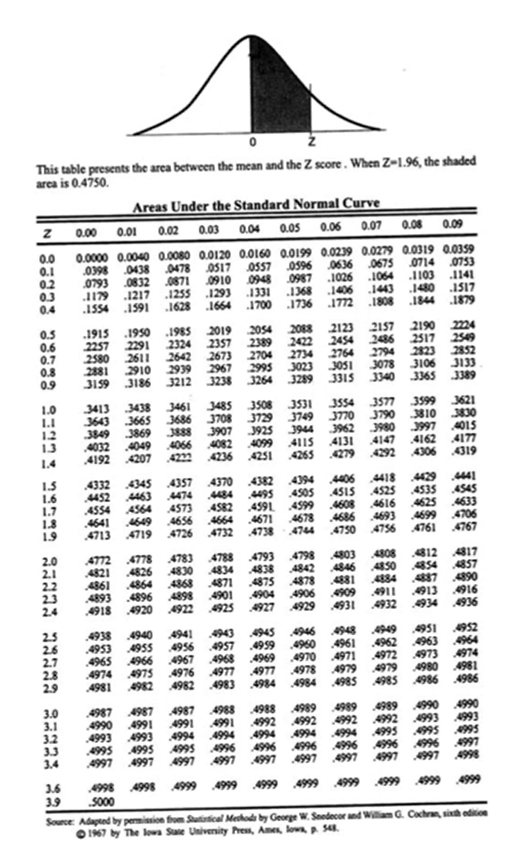

**Adım 3:**

zhesap = (19 - 20) / (5 /√100) = -2.00

(n = 100, standart sapma = 5, örnek ortalaması = 19)

**Adım 4:**

Zhesap = -2.00 < Ztablo = -1.96 olduğu için H0 reddedilir. (Zhesap negatif olduğu için Ztablo'nun negatif değeri değerlendirmeye alınır.)

**Adım 5:**

Dördüncü adımda geçirilen sürenin 20 saniye olduğunu iddia eden H0 hipotezi reddedilmiştir. Buna göre kullanıcılar istatistiksel olarak %95 güvenilirlik ile 4. adımda 20 saniyeden farklı zaman geçirmektedir.

## İş Uygulaması: Web Sitesinde Geçirilen Sürenin Testi

Problem:

Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?

Detaylar:

* Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.
* Bu veriler incelendiğinde bir yönetici ya da çalışan bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyor.

H0: μ = 170 (Web sitemizde geçirilen ortalama süre gerçekten 170 saniyedir.)

H1: μ != 170 (Web sitemizde geçirilen ortalama süre gerçekten 170 saniye değildir.)

In [7]:
import numpy as np

olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
                     157, 145, 127, 244, 163, 114, 145, 65, 112, 185, 202, 146, 
                     203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
                     216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [9]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [10]:
import scipy.stats as stats

In [11]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

Ortalama 154 değeri şansa bağlı bir şekilde oluşmuş olabilir. Başka örneklemler alındığında bu değer değişebilecektir. Şans faktörünü ortadan kaldırmak için hipotez testi yapılmaktadır.

## Varsayım Testi

**Normallik Varsayımı**

Histogram:

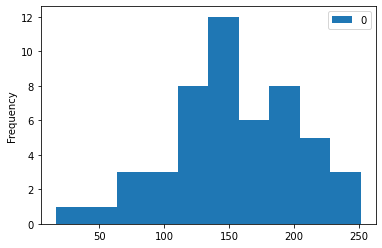

In [25]:
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

qqplot:

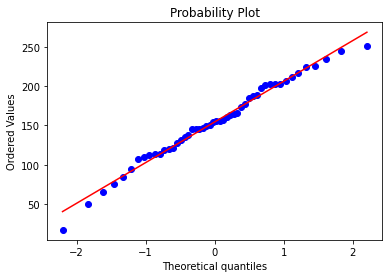

In [26]:
import pylab
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

Noktalar çizgi etrafındaysa normalliği sağlar. Bu örnek sağlamaktadır. Ancak bunlar görsel yardımlar ile yapıldığı için hataya müsait yaklaşımlardır. Bu gözlemler yerine Shapiro-Wilks testi yapılır.

Shapiro-Wilks Testi:

In [27]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

H0: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.

H1: Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

Shapiro-Wilks testinde pvalue > 0.05 olduğu için H0 hipotezi reddedilemez. Yani normal dağılım varsayımı sağlanmaktadır. Bu nedenle tek örneklem t testi uygulanabilir.

## Hipotez Testinin Uygulanması

In [24]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

pvalue < 0.05 olduğundan H0 hipotezi reddedilir. Yani web sitemizde geçirilen ortalama süre 170 saniye değildir.

## Nonparametrik Tek Örneklem Testi

Shapiro-Wilks testinde negatif sonuç alsaydık yani normallik varsayımı sağlanmasaydı bu test kullanılırdı.

In [29]:
from statsmodels.stats.descriptivestats import sign_test

In [30]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

Soldaki test istatistiğidir, sağdaki p-value'dir.

p-value > 0.05 olduğu için H0 reddedilemez.

## Tek Örneklem Oran Testi

Oransal bir ifade test edilmek istenildiğinde kullanılır.

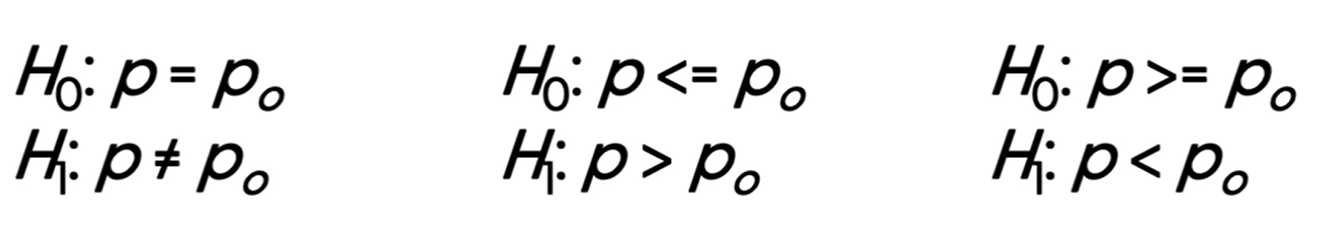

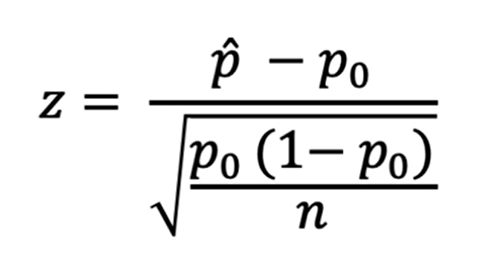

Varsayım: n > 30. İlgilendiğimiz kitlede aldığımız örneklem 30'dan büyükse bu test gerçekleştirilebilir.

## İş Uygulaması: Dönüşüm Oranı Testi

Problem:

Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edildiği ifade edilmiş. Fakat bu durum kontrol edilmek isteniyor çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.

Detaylar:

* 500 kişi dış mecrada reklamlara tıklamış, 40 tanesi sitemize gelip alışveriş yapmış.
* Örnek üzerinde elde edilen dönüşüm oranı: 40/500 = 0.08

H0: p = 0.125
    
H1: p != 0.125

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
count = 40
nobs = 500
value = 0.125

In [33]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

p-value < 0.05 olduğu için H0 hipotezi reddedilir. Yani ürün satın alınmasına ilişkin dönüşüm oranı 0.125 değildir.

## **Bağımsız İki Örneklem T Testi**

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

**Hipotezler**

 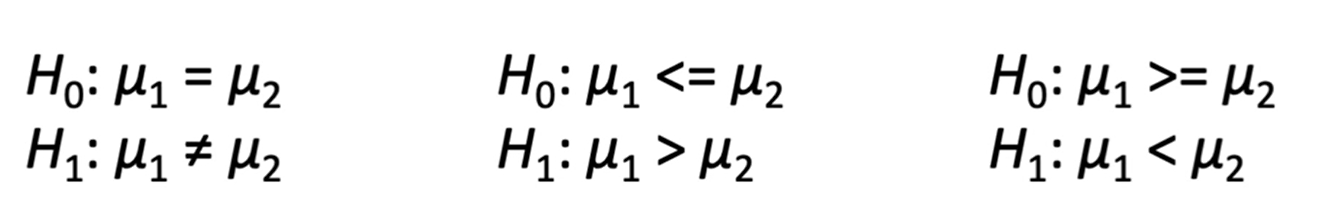

**Test İstatistiği**

Grupların örnek sayıları aynı ve varyansları homojen ise;

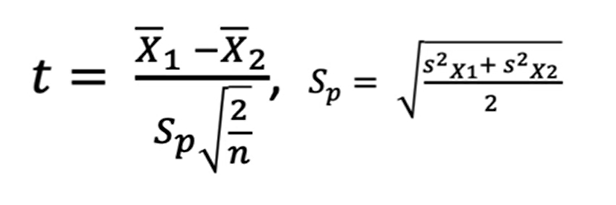

Grupların örnek sayıları farklı ve varyansları homojen ise;

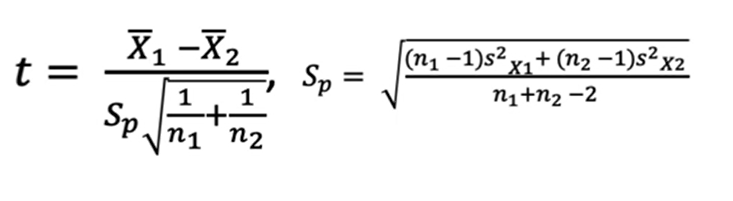

Grupların örnek sayıları farklı ve varyansları homojen değil ise; 

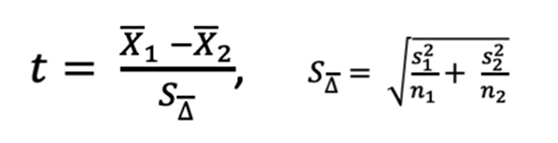

**Varsayımlar**

* Normallik Varsayımı
* Varyans Homojenliği Varsayımı

## İş Uygulaması: ML Modelinin Başarı Testi

Problem:

Bir ML projesine yatırım yapılmış. Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.

Detaylar:

* Model geliştirilmiş ve web sitesine entegre edilmiştir.
* Site kullanıcıları belirli bir kurala göre iki gruba bölünüyor.
* A grubu eski, B grubu yeni sistemi kullanıyor.
* Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

Hipotezler:

H0: μ1 = μ2

H1: μ1 != μ2

In [9]:
# Veri Tipi 1

import pandas as pd
import numpy as np

A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 25, 
                 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 31, 31, 27, 32,
                 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A", "B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [10]:
# Veri Tipi 2
A = pd.DataFrame([30, 27, 21, 27, 29, 30, 20, 20, 27, 32, 35, 22, 24, 23, 25, 27, 23, 27, 23, 25, 
                 21, 18, 24, 26, 33, 26, 27, 28, 19, 25])

B = pd.DataFrame([37, 39, 31, 31, 34, 38, 30, 36, 29, 28, 38, 28, 37, 37, 30, 32, 31, 31, 27, 32,
                 33, 33, 33, 31, 32, 33, 26, 32, 33, 29])

# A ve A'nın Grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

# B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

# Tüm Veri
AB = pd.concat([A,B])
AB.columns = ["gelir", "GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


Veri excel gibi bir formatta geldiğinde (Veri Tipi 1) direkt olarak üzerinde işlem yapılamaz. Verinin Veri Tipi 2'deki gibi düzenlenmesi gerekir fakat yukarıda yapılan işlem bu düzenlemenin en zor yoludur.

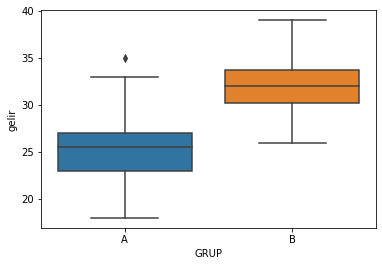

In [11]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

## Bağımsız İki Örneklem T Testi Varsayım Kontrolü

**Normallik Varsayımı**

In [12]:
from scipy.stats import shapiro

In [15]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

p-value > 0.05 olduğu için H0 hipotezi reddedilemez.

In [16]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

p-value > 0.05 olduğu için H0 hipotezi reddedilemez. (H0: Örnek dağılımı ile ana kitle teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.)

İki grup için de normallik varsayımı sağlanmaktadır.

**Varyans Homojenliği Varsayımı**

H0: Varyanslar homojendir.
    
H1: Varyanslar homojen değildir.

In [49]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

p-value > 0.05 olduğu için H0 hipotezi reddedilemez.

## Hipotez Testi

In [52]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

p-value < 0.05 olduğu için H0 hipotezi reddedilir. Farklılık olmadığını iddia eden H0 hipotezi reddedilir yani farklılık vardır.

## Nonparametrik Bağımsız İki Örneklem Testi

Hem normallik varsayımı hem de varyans homojenliği varsayımı sağlanmıyorsa nonparametrik bağımsız iki örneklem testi uygulanır.

In [53]:
stats.mannwhitneyu(A_B["A"], A_B["B"])

MannwhitneyuResult(statistic=89.5, pvalue=4.778975189306267e-08)

p-value < 0.05 olduğu için H0 hipotezi reddedilir.

## **Bağımlı İki Örneklem T Testi**

Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.

**Hipotezler**

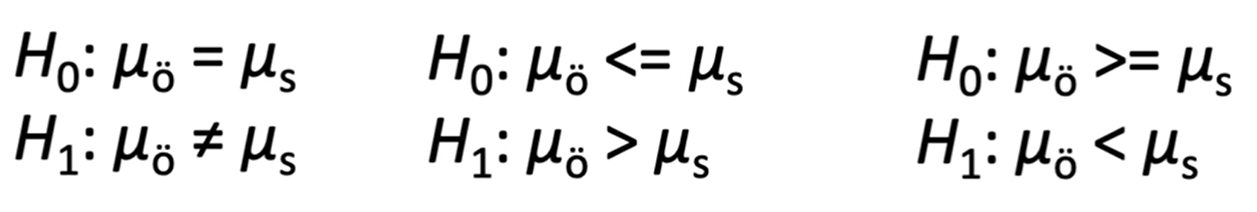

**Test İstatistiği**

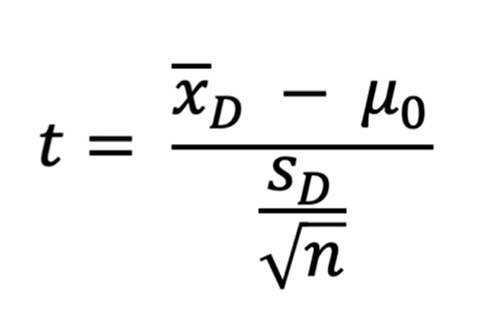

**Varsayım**

* Normallik Varsayımı
* Varyans Homojenliği Varsayımı

## İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü

Problem:
    
Belirli uğraşlar spnucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

Detaylar:

* Bir departman bir konuda eğitim talep ediyor.
* Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
* Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
* Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

Hipotezler:

H0: μö = μs (Eğitim öncesi ve sonrası herhangi bir farklılık yoktur)

H1: μö != μs (Eğitim sonrasında farklılık oluşmuştur)

In [54]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,
                      115,115,119,118,121,117,117,120,120,121,117,118,117,123,118,124,121,115,118,
                      125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,
                       129,129,138,134,124,122,126,133,127,130,130,130,132,117,130,125,129,133,120,
                       127,123])

In [57]:
# Veri Seti 1
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI", "SONRASI"]
print("'AYRIK' Veri Seti: \n\n", AYRIK.head(), "\n\n")

# Veri Seti 2
# A ve A'nın Grubu
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)

# B ve B'nin Grubu
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

# Tüm Veri
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

BIRLIKTE.columns = ["PERFORMANS", "ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n\n")

'AYRIK' Veri Seti: 

    ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 




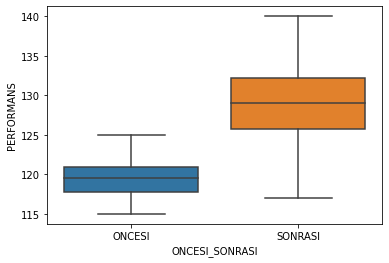

In [59]:
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

## Bağımlı İki Örneklem T Testi Varsayım Kontrolü

**Normallik Varsayımı**

In [60]:
from scipy.stats import shapiro

In [62]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

p-value > 0.05 olduğu için H0 hipotezi reddedilemez.

In [63]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

p-value > 0.05 olduğu için H0 hipotezi reddedilemez.

İki grup için de normallik varsayımı sağlanmaktadır.

**Varyans Homojenliği Varsayımı**

In [64]:
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

p-value < 0.05 olduğu için H0 hipotezi reddedilir. Bu nedenle varyans homojenliği varsayımı sağlanmamaktadır. Bağımlı iki örneklem T testinde varyans homojenliğinin sağlanmaması göz ardı edilebilir.

## Hipotez Testi

In [66]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

p-value < 0.05 olduğu için H0 hipotezi reddedilir. Yani eğitim sonrasında farklılık oluşmuştur. Verilen eğitim performansları olumlu yönde etkilemiştir.

## Nonparametrik Bağımlı İki Örneklem Testi

Hem normallik varsayımı hem de varyans homojenliği varsayımı sağlanmıyorsa nonparametrik bağımlı iki örneklem testi uygulanır.

In [67]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

p-value < 0.05 olduğu için H0 hipotezi reddedilir.

## **İki Örneklem Oran Testi**

İki oran arasında karşılaştırma yapmak için kullanılır.

**Hipotezler**

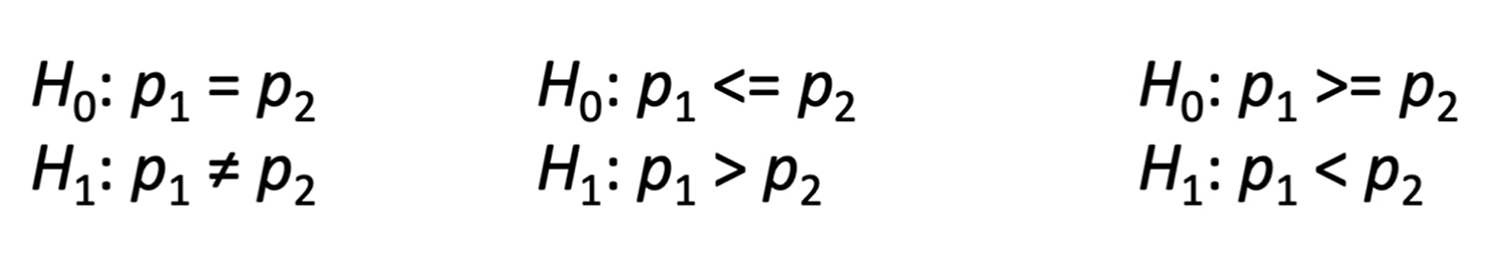

**Test İstatistiği**

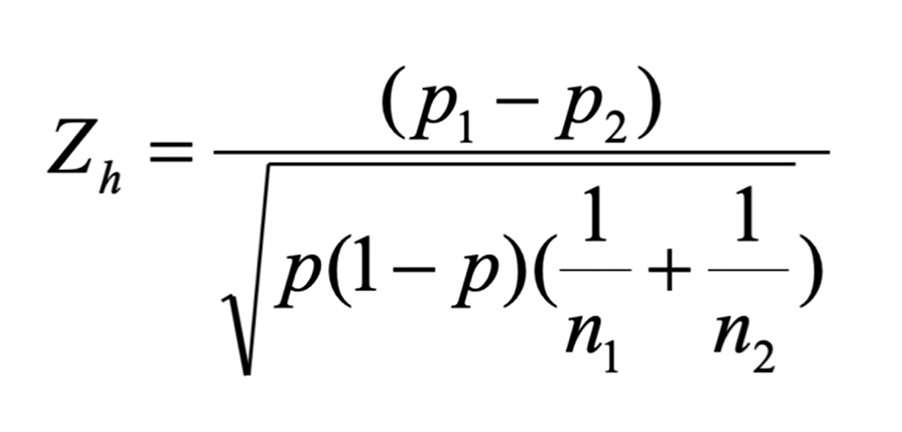

**Varsayımlar**

* n1 > 30
* n2 > 30

## İş Uygulaması: Kullanıcı Arayüzü Deneyi

Problem:
    
Kırmızı buton mu yeşil buton mu?

Detaylar:

* Yeşil buton 1000 görüntülenme 300 tıklama
* Kırmızı buton 1100 görüntülenme 250 tıklama

H0: P1 <= P2
    
H1: P1 > P2

In [68]:
from statsmodels.stats.proportion import proportions_ztest

In [69]:
basari_sayisi = np.array([300, 250])
gozlem_sayisi = np.array([1000, 1100])

In [70]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayisi)

(3.7857863233209255, 0.0001532232957772221)

p-value < 0.05 olduğu için H0 hipotezi reddedilir.

## **Varyans Analizi**

İki ya da daha fazla grup ortalaması arasında istatistiksel olarak anlamlı bir farklılığın olup olmadığı öğrenilmek istenildiğinde kullanılır.

**Hipotezler**

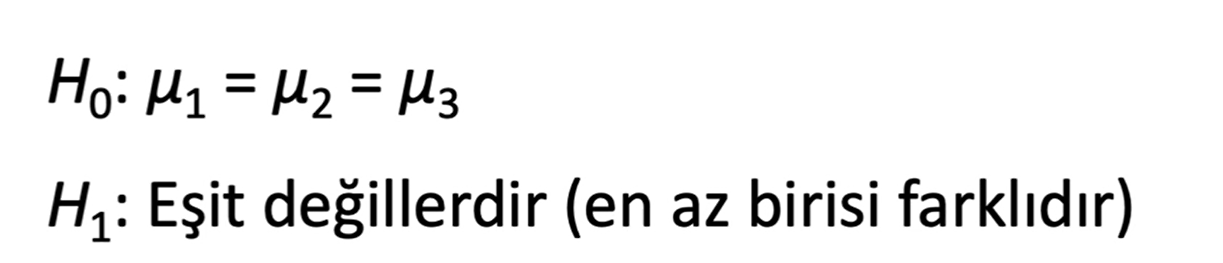

**Test İstatistiği**

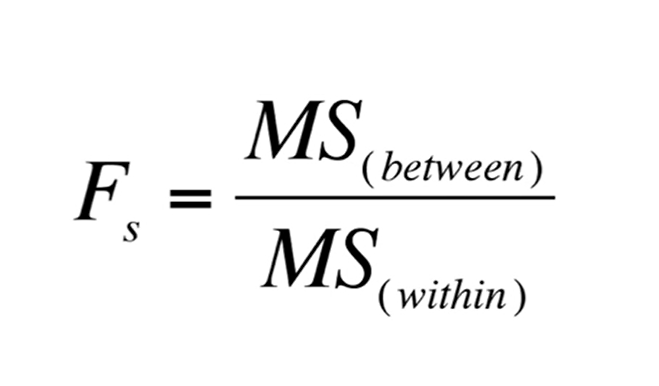

**Varsayımlar**

* Gözlemlerin (grupların) birbirinden bağımsız olması varsayımı
* Normal dağılım varsayımı
* Varyans homojenliği varsayımı

## İş Uygulaması: Anasayfa İçerik Stratejisi Belirleme

Problem:

Anasayfa'da geçirilen süre artırmak isteniliyor.

Detaylar:

* Bir web sitesi başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
* Uzun zaman geçiren kullanıcıların reklamlarda daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
* Buna yönelik benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
* A: Olduğu gibi, B: Yönlendiricili, C: İlgi çekici

In [71]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A", "GRUP_B", "GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


## Varyans Analizi Varsayım Kontrolü

**Bağımsızlık Varsayımı**

Gruplar birbirlerinden bağımsız.

**Normallik Varsayımı**

from scipy.stats import shapiro

In [73]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.977165162563324, pvalue=0.8526773452758789)

In [74]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9653157591819763, pvalue=0.5784776210784912)

In [75]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9604302644729614, pvalue=0.4721103310585022)

Tüm p-value değerleri 0.05'den büyük olduğu için 3 grup için de normallik varsayımı sağlanmaktadır.

**Varyans Homojenliği Varsayımı**

In [76]:
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

LeveneResult(statistic=0.9446786090621706, pvalue=0.3939978753114075)

p-value > 0.05 olduğu için varyans homojenliği varsayımı sağlanmaktadır.

## Varyans Analizi Hipotez Testinin Uygulanması

In [77]:
from scipy.stats import f_oneway

In [78]:
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=53.46714172604916, pvalue=1.566295188711795e-14)

p-value < 0.05 olduğu için H0 hipotezi reddedilmiştir. Yani 3 grup karşılaştırıldığında web sitesinde geçirilen ortalama sürelerde anlamlı bir farklılık vardır.

In [79]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,23.0,29.956522,2.184205,25.0,28.5,30.0,31.0,34.0
GRUP_B,23.0,31.869565,2.701924,27.0,30.0,31.0,34.0,38.0
GRUP_C,23.0,37.521739,2.810202,33.0,35.0,38.0,39.5,43.0


İlgi çekici habercilik istatistiki olarak diğer gruplara göre daha anlamlı katkılar sunmaktadır.

## Nonparametrik Hipotez Testi

In [80]:
from scipy.stats import kruskal

In [81]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

KruskalResult(statistic=41.41835051661897, pvalue=1.014190318754816e-09)

p-value < 0.05 olduğu için H0 hipotezi reddedilmiştir.

## **Korelasyon Analizi**

Değişkenler arasındaki ilişki, bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bir yöntemdir.

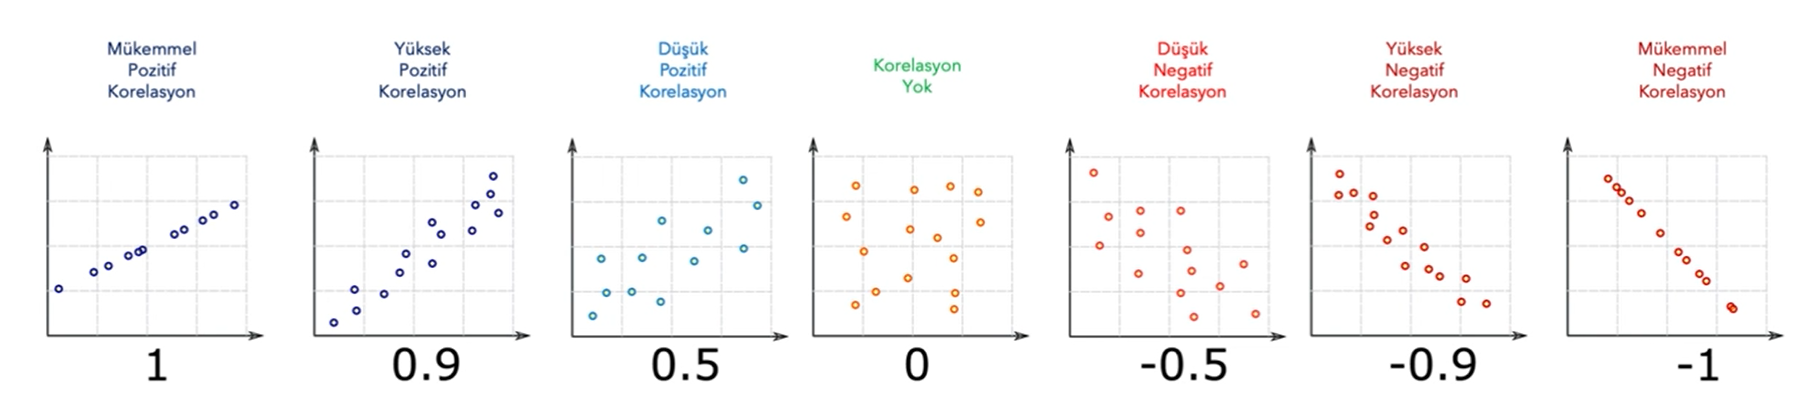

**Hipotezler**

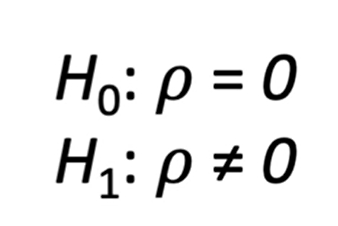

H0: Değişkenler arasında korelasyon yoktur.

H1: Değişkenler arasında korelasyon vardır.

**Test İstatistiği**

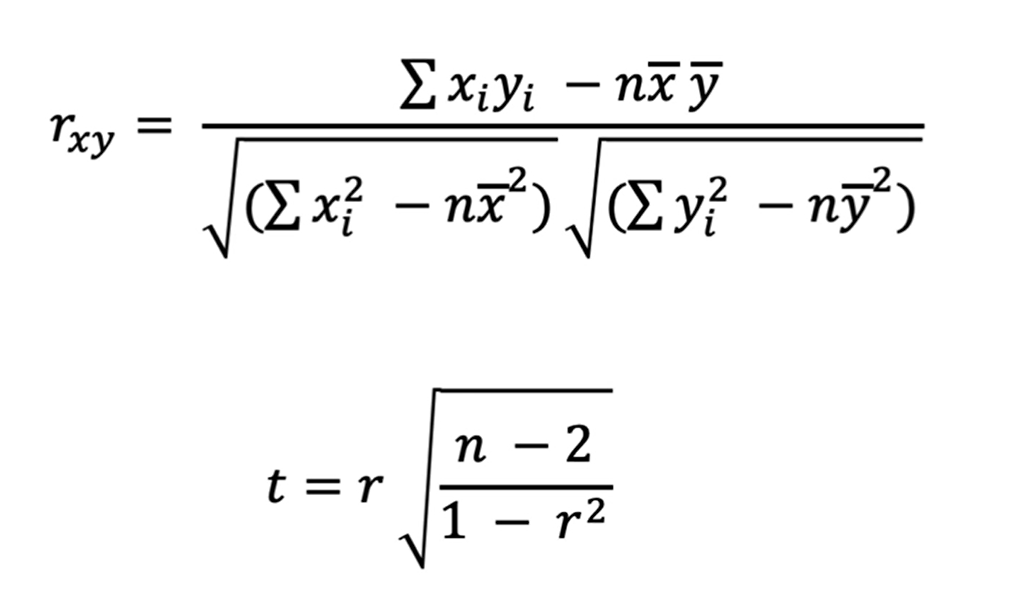

**Varsayımlar**

* İki değişken içinde normallik varsayımı
* Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
* Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

## İş Uygulaması: Bahşiş İle Ödenen Hesap Arasındaki İlişkinin İncelenmesi

Problem:
    
Bahşiş ile ödenen hesap arasında korelasyon var mı?

Hipotez:
    
H0: ρ = 0 (Hesap ile bahşiş arasında korelasyon yoktur)

H1: ρ != 0 (Hesap ile bahşiş arasında korelasyon vardır)

In [83]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Tips veri setindeki total_bill değişkeninin içerisinde bahşişler de mevcuttur bu nedenle bahşişlerin toplam hesaptan çıkarılarak toplam hesabın işleme katılması gerekmektedir.

In [84]:
 df["total_bill"] = df["total_bill"] - df["tip"]

In [85]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


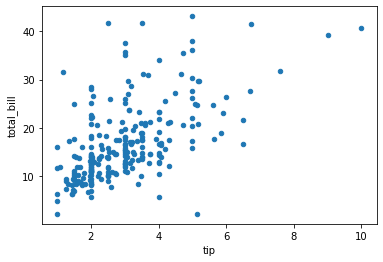

In [86]:
df.plot.scatter("tip", "total_bill");

## Kolerasyon Varsayım Kontrolü

In [87]:
from scipy.stats import shapiro

In [88]:
shapiro(df["tip"])

ShapiroResult(statistic=0.897811233997345, pvalue=8.20057563521992e-12)

In [89]:
shapiro(df["total_bill"])

ShapiroResult(statistic=0.9135652184486389, pvalue=1.1060377613780759e-10)

p-value değerleri 0.05'den küçük olduğu için iki değişken için de normallik varsayımı sağlanmamaktadır.

## Kolerasyon Katsayısı Hipotez Testi

### Korelasyon Katsayısı

In [90]:
df["tip"].corr(df["total_bill"])

0.5766634471096374

In [91]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

Değişkenler arasında pozitif yönlü, orta şiddetli bir korelasyon var.

### Korelasyonun Anlamlılığının Testi

In [92]:
from scipy.stats.stats import pearsonr

In [93]:
pearsonr(df["tip"], df["total_bill"])

(0.5766634471096381, 5.018290084948419e-23)

p-value < 0.05 olduğundan H0 hipotezi reddedilmiştir. Yani değişkenler arasında anlamlı bir korelasyon vardır.

## Nonparametrik Kolerasyon Hipotez Testi

In [95]:
stats.spearmanr(df["tip"], df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

p-value < 0.05 olduğundan H0 reddedilir. Değişkenler arasında orta şiddetli bir ilişki vardır.

In [96]:
stats.kendalltau(df["tip"], df["total_bill"])

KendalltauResult(correlation=0.4400790074919885, pvalue=7.131027725873721e-24)

p-value < 0.05 olduğundan H0 reddedilir. Değişkenler arasında orta şiddetli bir ilişki vardır.